# Data Analysis for the Biosensors Lab Report

### Conversion to csv

In [9]:
import pandas as pd
import numpy as np

# === Load Sheet ===

results_df = pd.read_csv("labresults.csv", header=0)


### Statistical Analysis

In [11]:
# Keep only first 19 columns (1 label + 18 sample columns)
results_df = results_df.iloc[:, :19]

ebwell_df = results_df.iloc[0:8].copy()
truematrix_df = results_df.iloc[8:16].copy()
accuchek_df = results_df.iloc[16:24].copy()


In [13]:
print("🧪 eBWell:")
print(ebwell_df)


🧪 eBWell:
  Sample\nglucose(mg/dL) Sample 1 Sample 2 Sample 3 Sample 4  Sample 5  \
0                A* - 70      NaN      5.3      6.3      6.2       NaN   
1                B* - 90      NaN      6.6      NaN      7.5       NaN   
2               C* - 110      NaN      9.4     10.9      9.4       9.1   
3               D* - 130      NaN     10.8      NaN     11.1       NaN   
4              F* - 1000      1.4      2.1      low      2.2       2.3   
5        G* - 90 + Lemon      NaN      8.3      NaN      8.3       8.1   
6               H* - 100      NaN      7.9      NaN      NaN       NaN   
7                    NaN      NaN      NaN      NaN      NaN       NaN   

   Sample 6  Sample 7  Sample 8 Sample 9 Sample 10 Sample 11  Sample 12  \
0       6.0       8.6       NaN      6.4       6.7       6.9        NaN   
1       5.9       9.2       NaN      7.7       7.5       7.3        NaN   
2      13.9      14.6       NaN     10.2      10.1       9.6        NaN   
3      16.7      18.1  

In [14]:

print("\n🧪 True Matrix:")
print(truematrix_df)



🧪 True Matrix:
   Sample\nglucose(mg/dL) Sample 1 Sample 2 Sample 3 Sample 4  Sample 5  \
8                 A* - 70      NaN      2.6      NaN      3.8       NaN   
9                 B* - 90      NaN      3.2      NaN      3.9       3.8   
10               C* - 110      NaN      5.1      NaN      4.9       NaN   
11               D* - 130      NaN        6      NaN      5.4       5.8   
12              F* - 1000      NaN      low      4.1   error!       NaN   
13        G* - 90 + Lemon      NaN      3.8      NaN      3.6       3.9   
14               H* - 100      NaN      4.5      4.1      NaN       NaN   
15                    NaN      NaN      NaN      NaN      NaN       NaN   

    Sample 6  Sample 7  Sample 8 Sample 9                    Sample 10  \
8        NaN       NaN       NaN      NaN  E-2 error for both machines   
9        NaN       NaN       NaN      3.8                          3.3   
10       NaN       NaN       NaN      4.7                          E-2   
11       NaN

In [15]:

print("\n🧪 Accu-Chek:")
print(accuchek_df)


🧪 Accu-Chek:
   Sample\nglucose(mg/dL) Sample 1 Sample 2 Sample 3 Sample 4  Sample 5  \
16                A* - 70      3.2      3.1      3.1      3.1       NaN   
17                B* - 90      NaN      3.3      NaN      4.1       NaN   
18               C* - 110      4.9        5      NaN      4.9       NaN   
19               D* - 130        6    error        6      6.1       NaN   
20              F* - 1000      Low      1.1      NaN      0.9       1.1   
21        G* - 90 + Lemon        3      4.2      NaN        4       NaN   
22               H* - 100      NaN      4.5      NaN      NaN       NaN   
23                    NaN      NaN      NaN      NaN      NaN       NaN   

    Sample 6  Sample 7  Sample 8   Sample 9 Sample 10 Sample 11  Sample 12  \
16       3.6       NaN       NaN        3.1         3       3.2        NaN   
17       4.2       NaN       NaN        4.1       4.1         4        NaN   
18       5.7       NaN       NaN          5       5.2       5.1        NaN  

In [16]:
reference_map = {
    "A* - 70": 3.9,
    "B* - 90": 5.0,
    "C* - 110": 6.1,
    "D* - 130": 7.2,
    "F* - 1000": 29.2,
    "G* - 90 + Lemon": 5.0,
    "H* - 100": np.nan  # optional: or guess it
}

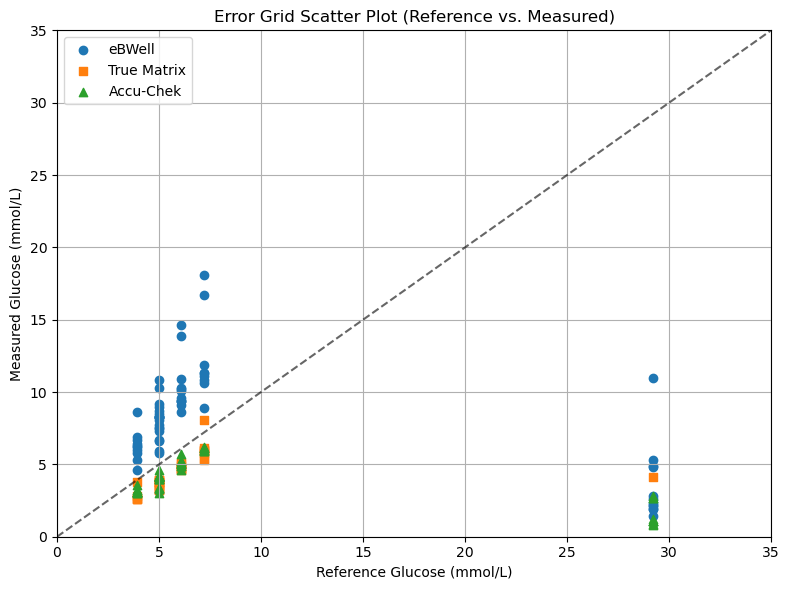

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV
results_df = pd.read_csv("labresults.csv", usecols=range(19))  # Trim to 18 samples + label

# Split into blocks
ebwell_df = results_df.iloc[0:8].copy()
truematrix_df = results_df.iloc[8:16].copy()
accuchek_df = results_df.iloc[16:24].copy()

# Set row labels as index
for df in [ebwell_df, truematrix_df, accuchek_df]:
    df.set_index(df.columns[0], inplace=True)

# Reference map (mmol/L)
reference_map = {
    "A* - 70": 3.9,
    "B* - 90": 5.0,
    "C* - 110": 6.1,
    "D* - 130": 7.2,
    "F* - 1000": 29.2,
    "G* - 90 + Lemon": 5.0
}

# Convert strings to floats, ignore invalid entries
def clean_numeric(df):
    return df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

ebwell_clean = clean_numeric(ebwell_df)
truematrix_clean = clean_numeric(truematrix_df)
accuchek_clean = clean_numeric(accuchek_df)

# Function to build (reference, measured) arrays
def get_ref_and_measured(df_clean):
    ref_vals = []
    measured_vals = []
    for index, row in df_clean.iterrows():
        if index not in reference_map:
            continue
        ref = reference_map[index]
        for val in row.dropna():
            ref_vals.append(ref)
            measured_vals.append(val)
    return np.array(ref_vals), np.array(measured_vals)

# Get data
ref_eb, meas_eb = get_ref_and_measured(ebwell_clean)
ref_tm, meas_tm = get_ref_and_measured(truematrix_clean)
ref_ac, meas_ac = get_ref_and_measured(accuchek_clean)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(ref_eb, meas_eb, label="eBWell", marker="o")
plt.scatter(ref_tm, meas_tm, label="True Matrix", marker="s")
plt.scatter(ref_ac, meas_ac, label="Accu-Chek", marker="^")
plt.plot([0, 35], [0, 35], 'k--', alpha=0.6)  # identity line
plt.xlabel("Reference Glucose (mmol/L)")
plt.ylabel("Measured Glucose (mmol/L)")
plt.title("Error Grid Scatter Plot (Reference vs. Measured)")
plt.legend()
plt.grid(True)
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.tight_layout()
plt.show()


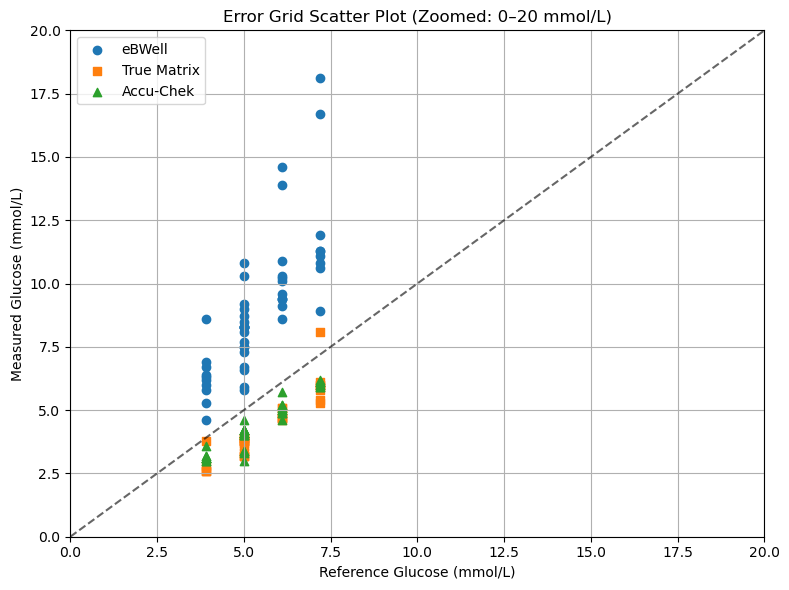

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(ref_eb, meas_eb, label="eBWell", marker="o")
plt.scatter(ref_tm, meas_tm, label="True Matrix", marker="s")
plt.scatter(ref_ac, meas_ac, label="Accu-Chek", marker="^")
plt.plot([0, 20], [0, 20], 'k--', alpha=0.6)  # identity line
plt.xlabel("Reference Glucose (mmol/L)")
plt.ylabel("Measured Glucose (mmol/L)")
plt.title("Error Grid Scatter Plot (Zoomed: 0–20 mmol/L)")
plt.legend()
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.tight_layout()
plt.show()


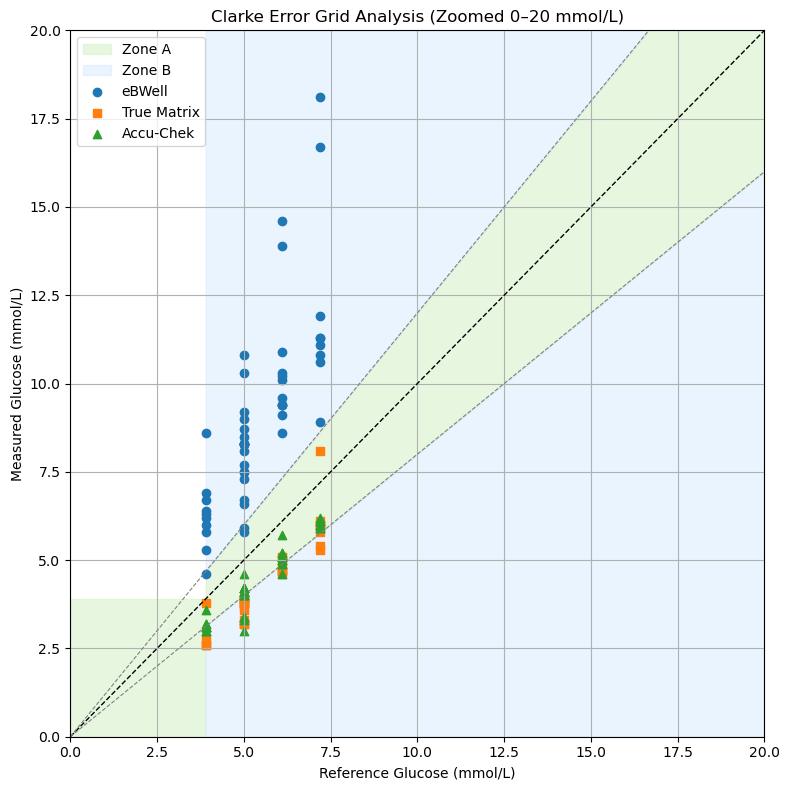

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_clarke_zones(ax):
    # Draw Clarke Zones (converted to mmol/L)
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 20)

    # Zone A region — within 20% or both < 3.9
    x = np.linspace(0, 20, 1000)
    ax.plot(x, x, 'k--', linewidth=1)  # identity line
    ax.plot(x, x * 1.2, 'gray', linestyle='--', linewidth=0.8)
    ax.plot(x, x * 0.8, 'gray', linestyle='--', linewidth=0.8)

    # Fill Zone A (between 0.8x and 1.2x lines OR both under 3.9)
    ax.fill_between(x, x * 0.8, x * 1.2, where=(x >= 3.9), color='#d0f0c0', label="Zone A", alpha=0.5)
    ax.fill_between(x, 0, 3.9, where=(x <= 3.9), color='#d0f0c0', alpha=0.5)

    # Zone B — adjacent to A (light blue)
    ax.fill_between(x, x * 1.2, 20, where=(x >= 3.9), color='#cce5ff', label="Zone B", alpha=0.4)
    ax.fill_between(x, 0, x * 0.8, where=(x >= 3.9), color='#cce5ff', alpha=0.4)

    # You can add more Zones (C, D, E) if needed, but A & B are most critical

# === PLOT ===
plt.figure(figsize=(8, 8))
ax = plt.gca()
plot_clarke_zones(ax)

# Plot the actual data
ax.scatter(ref_eb, meas_eb, label="eBWell", marker="o")
ax.scatter(ref_tm, meas_tm, label="True Matrix", marker="s")
ax.scatter(ref_ac, meas_ac, label="Accu-Chek", marker="^")

ax.set_xlabel("Reference Glucose (mmol/L)")
ax.set_ylabel("Measured Glucose (mmol/L)")
ax.set_title("Clarke Error Grid Analysis (Zoomed 0–20 mmol/L)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


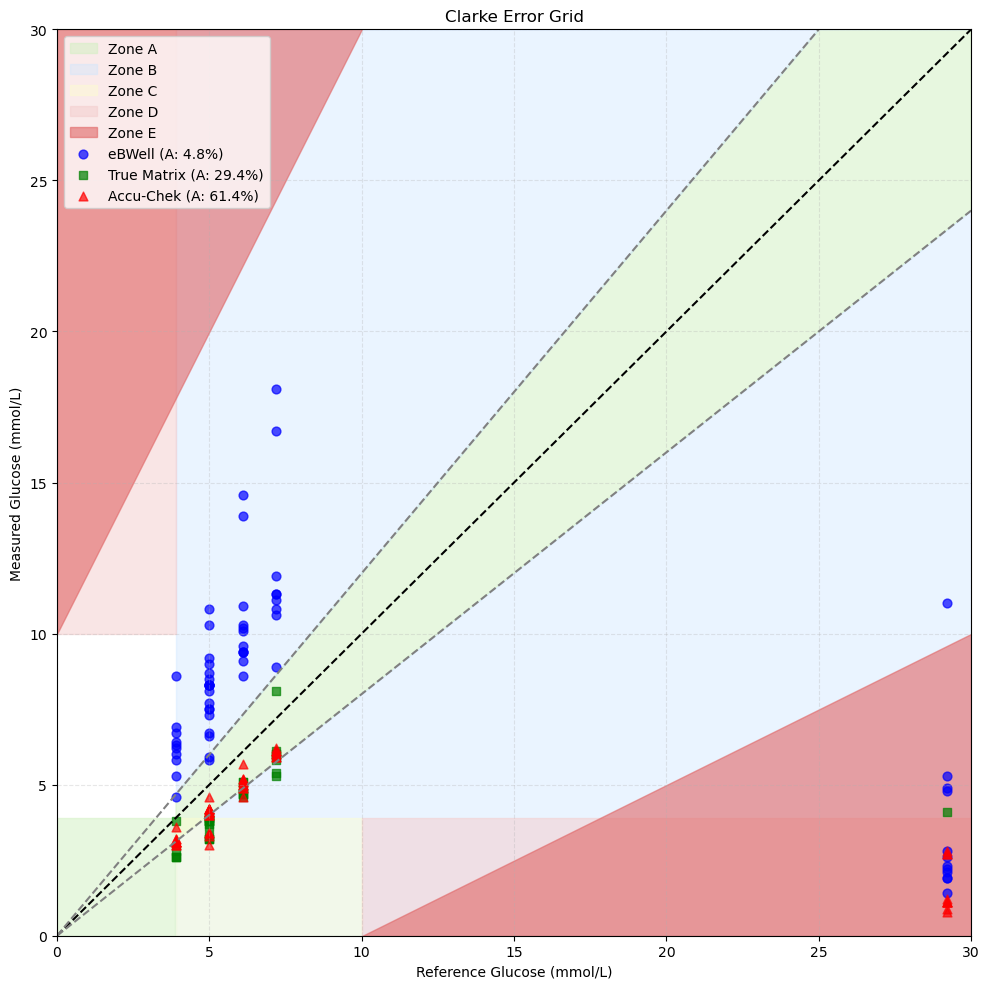

Clarke Error Grid Analysis Results:
eBWell:
  Zone A: 3 points (4.8%)
  Zone B: 45 points (71.4%)
  Zone C: 4 points (6.3%)
  Zone D: 3 points (4.8%)
  Zone E: 8 points (12.7%)
----------------------------------------
True Matrix:
  Zone A: 10 points (29.4%)
  Zone B: 23 points (67.6%)
  Zone C: 0 points (0.0%)
  Zone D: 1 points (2.9%)
  Zone E: 0 points (0.0%)
----------------------------------------
Accu-Chek:
  Zone A: 35 points (61.4%)
  Zone B: 12 points (21.1%)
  Zone C: 0 points (0.0%)
  Zone D: 0 points (0.0%)
  Zone E: 10 points (17.5%)
----------------------------------------


In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_clarke_grid(ax):
    # Zone A: within ±20% or both < 3.9
    x = np.linspace(0, 30, 1000)
    ax.plot(x, x, 'k--')  # identity line
    ax.plot(x, x * 1.2, 'gray', linestyle='--')
    ax.plot(x, x * 0.8, 'gray', linestyle='--')

    # Fill Zone A
    ax.fill_between(x, x * 0.8, x * 1.2, where=(x >= 3.9), color='#d0f0c0', label='Zone A', alpha=0.5)
    ax.fill_between(x, 0, 3.9, where=(x <= 3.9), color='#d0f0c0', alpha=0.5)

    # Fill Zone B
    ax.fill_between(x, x * 1.2, 30, where=(x >= 3.9), color='#cce5ff', label='Zone B', alpha=0.4)
    ax.fill_between(x, 0, x * 0.8, where=(x >= 3.9), color='#cce5ff', alpha=0.4)

    # Zone C
    ax.add_patch(patches.Polygon(
        [[3.9, 0], [3.9, 3.9], [10, 3.9], [10, 0]],
        closed=True, color='#ffffcc', label='Zone C', alpha=0.4
    ))

    # Zone D
    ax.add_patch(patches.Polygon(
        [[0, 10], [3.9, 10], [3.9, 30], [0, 30]],
        closed=True, color='#f4cccc', label='Zone D', alpha=0.5
    ))
    ax.add_patch(patches.Polygon(
        [[10, 0], [30, 0], [30, 3.9], [10, 3.9]],
        closed=True, color='#f4cccc', alpha=0.5
    ))

    # Zone E
    ax.add_patch(patches.Polygon(
        [[0, 10], [0, 30], [10, 30]],
        closed=True, color='#e06666', label='Zone E', alpha=0.6
    ))
    ax.add_patch(patches.Polygon(
        [[10, 0], [30, 0], [30, 10]],
        closed=True, color='#e06666', alpha=0.6
    ))

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    ax.set_xlabel("Reference Glucose (mmol/L)")
    ax.set_ylabel("Measured Glucose (mmol/L)")
    ax.set_title("Clarke Error Grid")
    ax.grid(True, linestyle='--', alpha=0.3)


# Create plot
plt.figure(figsize=(10, 10))
ax = plt.gca()
draw_clarke_grid(ax)

# Function to count points in each zone (using mmol/L values)
def count_in_zones(refs, preds):
    zone_count = [0, 0, 0, 0, 0]  # A, B, C, D, E
    
    for ref, pred in zip(refs, preds):
        # Convert to mg/dL for zone calculations (Clarke grid was defined in mg/dL)
        ref_mg = ref * 18.0
        pred_mg = pred * 18.0
        
        if (ref_mg <= 70 and pred_mg <= 70) or (pred_mg <= 1.2*ref_mg and pred_mg >= 0.8*ref_mg):
            zone_count[0] += 1  # Zone A
        elif (ref_mg >= 180 and pred_mg <= 70) or (ref_mg <= 70 and pred_mg >= 180):
            zone_count[4] += 1  # Zone E
        elif ((ref_mg >= 70 and ref_mg <= 290) and pred_mg >= ref_mg + 110) or \
             ((ref_mg >= 130 and ref_mg <= 180) and (pred_mg <= (7/5)*ref_mg - 182)):
            zone_count[2] += 1  # Zone C
        elif (ref_mg >= 240 and (pred_mg >= 70 and pred_mg <= 180)) or \
             (ref_mg <= 175/3 and pred_mg <= 180 and pred_mg >= 70) or \
             ((ref_mg >= 175/3 and ref_mg <= 70) and pred_mg >= (6/5)*ref_mg):
            zone_count[3] += 1  # Zone D
        else:
            zone_count[1] += 1  # Zone B
    
    return zone_count

# Calculate percentages for each dataset
eb_zones = count_in_zones(ref_eb, meas_eb)
tm_zones = count_in_zones(ref_tm, meas_tm)
ac_zones = count_in_zones(ref_ac, meas_ac)

# Plot data with percentage in Zone A in the legend
ax.scatter(ref_eb, meas_eb, 
          label=f"eBWell (A: {eb_zones[0]/len(ref_eb)*100:.1f}%)", 
          marker="o", color="blue", s=40, alpha=0.7)
ax.scatter(ref_tm, meas_tm, 
          label=f"True Matrix (A: {tm_zones[0]/len(ref_tm)*100:.1f}%)", 
          marker="s", color="green", s=40, alpha=0.7)
ax.scatter(ref_ac, meas_ac, 
          label=f"Accu-Chek (A: {ac_zones[0]/len(ref_ac)*100:.1f}%)", 
          marker="^", color="red", s=40, alpha=0.7)

# Add legend
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Print detailed zone statistics
devices = ["eBWell", "True Matrix", "Accu-Chek"]
all_zones = [eb_zones, tm_zones, ac_zones]
zone_names = ["A", "B", "C", "D", "E"]

print("Clarke Error Grid Analysis Results:")
print("=" * 40)
for i, device in enumerate(devices):
    zones = all_zones[i]
    total = sum(zones)
    print(f"{device}:")
    for j, zone in enumerate(zone_names):
        percent = (zones[j] / total) * 100
        print(f"  Zone {zone}: {zones[j]} points ({percent:.1f}%)")
    print("-" * 40)